## Step 1. Importing data

In [207]:
# read_csv function

import os
import pandas as pd
folder_name = 'Fibrazo'
dir = r'C:\Users\mcaba\OneDrive\Escritorio\Data Science\Company test\Company-test\{}'.format(folder_name)

def read_csv_fun(folder_name,file_name, path):
    path = dir
    os.chdir(path)
    df = pd.read_csv('{}.csv'.format(file_name), sep=',', low_memory=False, on_bad_lines='skip')
    return df

df_clients = read_csv_fun('Fibrazo','clients', dir)
print(df_clients.head(5))

      id  gaiia_id         status gaiia_status          City          name  \
0  54213   57771.0  Instalaciones       ACTIVE  Barranquilla  SANTODOMINGO   
1  69104   71312.0  Instalaciones       ACTIVE  Barranquilla      CARRIZAL   
2  16311   24969.0  Instalaciones    SUSPENDED     Cartagena    VILLA ROSA   
3  68472   70721.0  Instalaciones       ACTIVE  Barranquilla   SANTA MARIA   
4  15285   24147.0  Instalaciones       ACTIVE     Cartagena    VILLA ROSA   

                created_at  
0  2025-01-14 12:10:45.000  
1  2025-03-12 17:00:00.000  
2  2024-06-06 14:51:15.000  
3  2025-03-10 17:00:00.000  
4  2024-05-27 21:21:40.000  


In [208]:
df_client_journey = read_csv_fun('Fibrazo','client_journey', dir)
print(df_client_journey.head(5))

df_invoices = read_csv_fun('Fibrazo','invoices', dir)
print(df_invoices.head(5))

   gaiia_id                     date          status
0     15332  2023-07-31 05:24:36.783       SUSPENDED
1     17155  2023-07-31 05:24:37.897  SUSPENDED-LEAD
2     16629  2023-07-31 05:24:38.540  SUSPENDED-LEAD
3     16987  2023-07-31 05:24:39.609       SUSPENDED
4     16609  2023-07-31 05:24:40.071       SUSPENDED
      id               created_at  client_id payment_gateway
0  14183  2024-05-01 00:04:24.000       5688           NEQUI
1  14190  2024-05-01 00:07:08.000       8628           NEQUI
2  14180  2024-05-01 00:13:57.000      11289     SUPER_GIROS
3  14184  2024-05-01 00:24:50.000       6757     SUPER_GIROS
4  14185  2024-05-01 00:26:05.000       7607     SUPER_GIROS


## Step 2. Glimpse on the data

In [209]:
display(
    df_clients.head(5)
)

display(
    print(df_clients.isna().sum())
    )

display(
    print(len(df_clients))
    )

display(
    df_clients.info()
)

display(
    df_clients.value_counts("status")
)

display(
    df_clients.value_counts("gaiia_status")
)

display(
    df_clients.value_counts("City")
)

# we have 1 missing gaiia_id on the dataframe
# some columns need to be converted to other Data type for analysis. Ej: created_at      


,id,gaiia_id,status,gaiia_status,City,name,created_at
0,54213,57771.0,Instalaciones,ACTIVE,Barranquilla,SANTODOMINGO,2025-01-14 12:10:45.000
1,69104,71312.0,Instalaciones,ACTIVE,Barranquilla,CARRIZAL,2025-03-12 17:00:00.000
2,16311,24969.0,Instalaciones,SUSPENDED,Cartagena,VILLA ROSA,2024-06-06 14:51:15.000
3,68472,70721.0,Instalaciones,ACTIVE,Barranquilla,SANTA MARIA,2025-03-10 17:00:00.000
4,15285,24147.0,Instalaciones,ACTIVE,Cartagena,VILLA ROSA,2024-05-27 21:21:40.000


id              0
gaiia_id        1
status          0
gaiia_status    0
City            0
name            0
created_at      0
dtype: int64


None

48591


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48591 entries, 0 to 48590
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            48591 non-null  int64  
 1   gaiia_id      48590 non-null  float64
 2   status        48591 non-null  object 
 3   gaiia_status  48591 non-null  object 
 4   City          48591 non-null  object 
 5   name          48591 non-null  object 
 6   created_at    48591 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 2.6+ MB


None

status
Instalaciones    48298
Ventas             293
dtype: int64

gaiia_status
ACTIVE       30012
SUSPENDED    12109
INACTIVE      6118
PENDING        352
dtype: int64

City
Cartagena       36771
Barranquilla    11820
dtype: int64

In [210]:
## Is id a primary key?

df_clients = df_clients.sort_values(by="id", ascending=True)

# Check 1: Uniqueness of `id`
is_unique = df_clients["id"].is_unique
print(f"Is `id` unique? {is_unique}")

# Check 2: Non-Null Values in `id`
has_nulls = df_clients["id"].isnull().any()
print(f"Does `id` have null values? {has_nulls}")

# Check 3: Incremental Values in `id`
is_incremental = df_clients["id"].is_monotonic_increasing
print(f"Is `id` incremental? {is_incremental}")

# Check for Duplicates in `id`
duplicates = df_clients[df_clients.duplicated("id", keep=False)]
if not duplicates.empty:
    print("\nDuplicate `id` values found:")
    display(duplicates)
else:
    print("\nNo duplicate `id` values found.")

Is `id` unique? True
Does `id` have null values? False
Is `id` incremental? True

No duplicate `id` values found.


In [211]:
display(
    df_client_journey.head(5)
)

display(
    print(df_client_journey.isna().sum())
    )

display(
    print(len(df_client_journey))
    )

display(
    df_client_journey.info()
)

display(
    df_client_journey.value_counts("status")
)

# some columns need to be converted to other Data type for analysis. Ej: date


,gaiia_id,date,status
0,15332,2023-07-31 05:24:36.783,SUSPENDED
1,17155,2023-07-31 05:24:37.897,SUSPENDED-LEAD
2,16629,2023-07-31 05:24:38.540,SUSPENDED-LEAD
3,16987,2023-07-31 05:24:39.609,SUSPENDED
4,16609,2023-07-31 05:24:40.071,SUSPENDED


gaiia_id    0
date        0
status      0
dtype: int64


None

796867


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 796867 entries, 0 to 796866
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   gaiia_id  796867 non-null  int64 
 1   date      796867 non-null  object
 2   status    796867 non-null  object
dtypes: int64(1), object(2)
memory usage: 18.2+ MB


None

status
ACTIVE            397111
SUSPENDED         374609
TRIAL               8608
SUSPENDED-LEAD      5884
INACTIVE            4458
INACTIVE-LEAD       4030
PENDING             2166
LEAD                   1
dtype: int64

In [212]:
## Is gaiia_id a primary key?

df_client_journey = df_client_journey.sort_values(by="gaiia_id", ascending=True)

# Check 1: Uniqueness of `gaiia_id`
is_unique = df_client_journey["gaiia_id"].is_unique
print(f"Is `gaiia_id` unique? {is_unique}")

# Check 2: Non-Null Values in `gaiia_id`
has_nulls = df_client_journey["gaiia_id"].isnull().any()
print(f"Does `gaiia_id` have null values? {has_nulls}")

# Check 3: Incremental Values in `gaiia_id`
is_incremental = df_client_journey["gaiia_id"].is_monotonic_increasing
print(f"Is `gaiia_id` incremental? {is_incremental}")

# Check for Duplicates in `gaiia_id`
duplicates = df_client_journey[df_client_journey.duplicated("gaiia_id", keep=False)]
if not duplicates.empty:
    print("\nDuplicate `gaiia_id` values found:")
    display(duplicates)
else:
    print("\nNo duplicate `gaiia_id` values found.")

Is `gaiia_id` unique? False
Does `gaiia_id` have null values? False
Is `gaiia_id` incremental? True

Duplicate `gaiia_id` values found:


,gaiia_id,date,status
44883,15001,2024-02-14 14:46:12.312,ACTIVE
23425,15001,2023-11-27 17:20:09.776,SUSPENDED
15065,15001,2023-10-18 22:24:50.994,SUSPENDED
132370,15001,2024-07-17 19:52:49.736,SUSPENDED
132372,15001,2024-07-17 19:54:54.227,ACTIVE
...,...,...,...
796711,67743,2025-03-14 06:04:00.047,SUSPENDED-LEAD
796771,67748,2025-03-14 06:04:21.842,SUSPENDED-LEAD
751361,67748,2025-02-26 20:11:30.845,TRIAL
751507,67846,2025-02-26 21:01:42.388,TRIAL


In [213]:
display(
    df_invoices.head(5)
)

display(
    print(df_invoices.isna().sum())
    )

display(
    print(len(df_invoices))
    )

display(
    df_invoices.info()
)

display(
    df_invoices.value_counts("payment_gateway")
)

# some columns need to be converted to other Data type for analysis. Ej: created_at

,id,created_at,client_id,payment_gateway
0,14183,2024-05-01 00:04:24.000,5688,NEQUI
1,14190,2024-05-01 00:07:08.000,8628,NEQUI
2,14180,2024-05-01 00:13:57.000,11289,SUPER_GIROS
3,14184,2024-05-01 00:24:50.000,6757,SUPER_GIROS
4,14185,2024-05-01 00:26:05.000,7607,SUPER_GIROS


id                 0
created_at         0
client_id          0
payment_gateway    0
dtype: int64


None

424464


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424464 entries, 0 to 424463
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               424464 non-null  int64 
 1   created_at       424464 non-null  object
 2   client_id        424464 non-null  int64 
 3   payment_gateway  424464 non-null  object
dtypes: int64(2), object(2)
memory usage: 13.0+ MB


None

payment_gateway
NEQUI                    397146
SUPER_GIROS               22355
MERCADO_PAGO_TRANSFER      2726
GIFT                       1949
PAYVALIDA_TRANSFER          288
dtype: int64

In [214]:
## Is id a primary key?

df_invoices = df_invoices.sort_values(by="id", ascending=True)

# Check 1: Uniqueness of `id`
is_unique = df_invoices["id"].is_unique
print(f"Is `id` unique? {is_unique}")

# Check 2: Non-Null Values in `id`
has_nulls = df_invoices["id"].isnull().any()
print(f"Does `id` have null values? {has_nulls}")

# Check 3: Incremental Values in `id`
is_incremental = df_invoices["id"].is_monotonic_increasing
print(f"Is `id` incremental? {is_incremental}")

# Check for Duplicates in `id`
duplicates = df_invoices[df_invoices.duplicated("id", keep=False)]
if not duplicates.empty:
    print("\nDuplicate `id` values found:")
    display(duplicates)
else:
    print("\nNo duplicate `id` values found.")

Is `id` unique? True
Does `id` have null values? False
Is `id` incremental? True

No duplicate `id` values found.


## Step 3. Cleaning Data

In [215]:
#Dropping missing values
threshold = len(df_clients) * 0.05
print(threshold)

cols_to_drop = df_clients.columns[df_clients.isna().sum() <= threshold]
print(cols_to_drop)

df_clients.dropna(subset=cols_to_drop, inplace=True)

#Seems to be just one register, and without this field, 
# it is not possible to perform all the intended joins, 
# the goal is to find trends in the data, 
# so it is convenient to drop the only missing one

2429.55
Index(['id', 'gaiia_id', 'status', 'gaiia_status', 'City', 'name',
       'created_at'],
      dtype='object')


In [216]:
display(
    print(df_clients.isna().sum())
    )

display(
    print(len(df_clients))
    )

id              0
gaiia_id        0
status          0
gaiia_status    0
City            0
name            0
created_at      0
dtype: int64


None

48590


None

In [217]:
#Transforming data columns into the correct Dtype to be able to perform date-time analysis

df_clients["created_at"] = pd.to_datetime(df_clients["created_at"])

df_client_journey["date"] = pd.to_datetime(df_client_journey["date"])

df_invoices["created_at"] = pd.to_datetime(df_invoices["created_at"])

In [218]:
display(
    df_clients.info()
)

display(
    df_client_journey.info()
)

display(
    df_invoices.info()
)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48590 entries, 42832 to 2280
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            48590 non-null  int64         
 1   gaiia_id      48590 non-null  float64       
 2   status        48590 non-null  object        
 3   gaiia_status  48590 non-null  object        
 4   City          48590 non-null  object        
 5   name          48590 non-null  object        
 6   created_at    48590 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 3.0+ MB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 796867 entries, 44883 to 794440
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   gaiia_id  796867 non-null  int64         
 1   date      796867 non-null  datetime64[ns]
 2   status    796867 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 24.3+ MB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 424464 entries, 888 to 424463
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   id               424464 non-null  int64         
 1   created_at       424464 non-null  datetime64[ns]
 2   client_id        424464 non-null  int64         
 3   payment_gateway  424464 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 16.2+ MB


None

In [219]:
min_date = df_clients["created_at"].min()
max_date = df_clients["created_at"].max()
print(f"Minimum Date: {min_date}")
print(f"Maximum Date: {max_date}")

df_clients["year"] = df_clients["created_at"].dt.year

display(
    df_clients.value_counts("year")
)

# we seem to have two records with time outlyers
# records make sense to be between 2023-2025
# 1996 and 1964 are way back before company creation, this is inconsistent data

Minimum Date: 1964-07-20 10:50:09
Maximum Date: 2025-03-13 22:40:11


year
2024    32249
2025    12009
2023     4330
1964        1
1996        1
dtype: int64

In [220]:
min_date = df_client_journey["date"].min()
max_date = df_client_journey["date"].max()
print(f"Minimum Date: {min_date}")
print(f"Maximum Date: {max_date}")

df_client_journey["year"] = df_client_journey["date"].dt.year

display(
    df_client_journey.value_counts("year")
)

# records make sense to be between 2023-2025

Minimum Date: 2023-07-31 05:24:36.783000
Maximum Date: 2025-03-14 06:06:59.163000


year
2024    460823
2025    304603
2023     31441
dtype: int64

In [221]:
min_date = df_invoices["created_at"].min()
max_date = df_invoices["created_at"].max()
print(f"Minimum Date: {min_date}")
print(f"Maximum Date: {max_date}")

df_invoices["year"] = df_invoices["created_at"].dt.year

display(
    df_invoices.value_counts("year")
)

# records are available between 2024-2025 this may limit our scope of analysis
# to provide a clear trend using payment_gateway info

Minimum Date: 2024-05-01 00:04:24
Maximum Date: 2025-03-14 15:35:06


year
2024    227619
2025    196845
dtype: int64

In [222]:
# On this case the most reasonable thing to do is to drop inconsistent date data 
# since there is only one created_at per client id, there is no other way to imput it
# also this are only two rows of data, 0.004% of df_clients

outliers = df_clients[df_clients["created_at"].dt.year.isin([1996, 1964])]
print(outliers)

df_clients = df_clients[~df_clients["created_at"].dt.year.isin([1996, 1964])]


         id  gaiia_id         status gaiia_status       City  \
38938  4794   16910.0  Instalaciones     INACTIVE  Cartagena   
39631  5634   17750.0  Instalaciones     INACTIVE  Cartagena   

                   name          created_at  year  
38938  UB NUEVA VENECIA 1996-11-28 16:34:09  1996  
39631     LA CANDELARIA 1964-07-20 10:50:09  1964  


In [223]:
display(
    df_clients.value_counts("year")
)

year
2024    32249
2025    12009
2023     4330
dtype: int64

In [224]:
print(df_client_journey[df_client_journey["gaiia_id"] == 15103].value_counts("status"))

status
ACTIVE       11
SUSPENDED    10
INACTIVE      1
PENDING       1
dtype: int64


## Step 4. Feature Engineering

In [225]:
# Create the churned column
df_client_journey["churned"] = df_client_journey["status"].apply(
    lambda x: 1 if x in ["SUSPENDED", "INACTIVE", "SUSPENDED-LEAD", "INACTIVE-LEAD"] else 0
)

# Display the updated DataFrame
print(df_client_journey.head())

        gaiia_id                    date     status  year  churned
44883      15001 2024-02-14 14:46:12.312     ACTIVE  2024        0
23425      15001 2023-11-27 17:20:09.776  SUSPENDED  2023        1
15065      15001 2023-10-18 22:24:50.994  SUSPENDED  2023        1
132370     15001 2024-07-17 19:52:49.736  SUSPENDED  2024        1
132372     15001 2024-07-17 19:54:54.227     ACTIVE  2024        0


In [226]:
# Create the Retained column
df_client_journey["retained"] = df_client_journey["status"].apply(
    lambda x: 1 if x in ["ACTIVE", "TRIAL", "LEAD", "PENDING"] else 0
)

# Display the updated DataFrame
print(df_client_journey.head())

        gaiia_id                    date     status  year  churned  retained
44883      15001 2024-02-14 14:46:12.312     ACTIVE  2024        0         1
23425      15001 2023-11-27 17:20:09.776  SUSPENDED  2023        1         0
15065      15001 2023-10-18 22:24:50.994  SUSPENDED  2023        1         0
132370     15001 2024-07-17 19:52:49.736  SUSPENDED  2024        1         0
132372     15001 2024-07-17 19:54:54.227     ACTIVE  2024        0         1


In [227]:
# Function to calculate subscription duration for each client
def calculate_subscription_duration(group):
    # Sort by date
    group = group.sort_values(by="date")
    
    # Initialize list to store durations
    durations = []
    
    # Iterate through the group to calculate durations
    for i in range(len(group)):
        if group.iloc[i]["status"] in ["ACTIVE", "TRIAL", "LEAD", "PENDING"]:
            # Find the closest SUSPENDED or INACTIVE event after this ACTIVE event
            for j in range(i + 1, len(group)):
                if group.iloc[j]["status"] in ["SUSPENDED", "INACTIVE", "SUSPENDED-LEAD", "INACTIVE-LEAD"]:
                    duration = (group.iloc[j]["date"] - group.iloc[i]["date"]).days
                    durations.append({
                        "gaiia_id": group.iloc[i]["gaiia_id"],
                        "active_date": group.iloc[i]["date"],
                        "subscription_duration": duration
                    })
                    break  # Stop after finding the closest event
    
    # Convert the result to a DataFrame
    durations_df = pd.DataFrame(durations)
    return durations_df

# Apply the function to each client
subscription_durations = df_client_journey.groupby("gaiia_id").apply(calculate_subscription_duration).reset_index(drop=True)

# Merge subscription durations with df_client_journey
df_client_journey = df_client_journey.merge(
    subscription_durations,
    left_on=["gaiia_id", "date"],
    right_on=["gaiia_id", "active_date"],
    how="left"
)

# Drop the temporary active_date column
df_client_journey = df_client_journey.drop(columns=["active_date"])

# Display the updated DataFrame
print(df_client_journey.head())

   gaiia_id                    date     status  year  churned  retained  \
0     15001 2024-02-14 14:46:12.312     ACTIVE  2024        0         1   
1     15001 2023-11-27 17:20:09.776  SUSPENDED  2023        1         0   
2     15001 2023-10-18 22:24:50.994  SUSPENDED  2023        1         0   
3     15001 2024-07-17 19:52:49.736  SUSPENDED  2024        1         0   
4     15001 2024-07-17 19:54:54.227     ACTIVE  2024        0         1   

   subscription_duration  
0                    0.0  
1                    NaN  
2                    NaN  
3                    NaN  
4                    0.0  


In [228]:
# Filter for a specific client
client_data = df_client_journey[df_client_journey["gaiia_id"] == 15103]

# Display the client's data
print(client_data[["gaiia_id", "date", "status", "churned", "retained", "subscription_duration"]])

      gaiia_id                    date     status  churned  retained  \
3575     15103 2024-06-04 13:19:13.952     ACTIVE        0         1   
3576     15103 2024-03-26 15:03:58.924  SUSPENDED        1         0   
3577     15103 2024-08-04 18:06:46.202  SUSPENDED        1         0   
3578     15103 2025-02-14 21:04:23.662  SUSPENDED        1         0   
3579     15103 2024-08-06 01:34:58.059     ACTIVE        0         1   
3580     15103 2024-03-26 21:41:00.308     ACTIVE        0         1   
3581     15103 2024-06-03 22:04:41.683  SUSPENDED        1         0   
3582     15103 2025-03-01 03:03:55.990  SUSPENDED        1         0   
3583     15103 2023-08-03 23:37:38.510     ACTIVE        0         1   
3584     15103 2025-03-03 20:00:36.036     ACTIVE        0         1   
3585     15103 2025-01-14 13:03:49.135  SUSPENDED        1         0   
3586     15103 2023-11-02 17:39:31.201   INACTIVE        1         0   
3587     15103 2024-11-07 13:26:07.616     ACTIVE        0      

In [229]:
display(
    df_client_journey.value_counts("subscription_duration").head(15)
)

subscription_duration
7.0     83434
1.0     74808
10.0    41509
2.0     36529
15.0    31709
30.0    22715
4.0     12590
3.0      8270
8.0      7540
31.0     6360
5.0      5921
46.0     4319
14.0     4170
0.0      2656
37.0     2612
dtype: int64

In [230]:
# Define the mapping logic
def map_subscription_duration(duration):
    if pd.isna(duration):  # Handle NaN values
        return "N/A"
    elif duration <= 1:
        return "1 day"
    elif duration == 2:
        return "2 days"
    elif duration > 2 and duration < 7:
        return "3-6 days"
    elif duration == 7:
        return "1 week"
    elif duration > 7 and duration < 10:
        return "8-9 days"
    elif duration == 10:
        return "10 days"
    elif duration > 10 and duration < 15:
        return "11-14 days"
    elif duration == 15:
        return "15 days"
    elif duration > 15 and duration < 30:
        return "16-29 days"
    elif duration == 30:
        return "1 month"
    else:
        return "+ 1 month"

# Apply the mapping to create the new column
df_client_journey["subscription_duration_type"] = df_client_journey["subscription_duration"].apply(map_subscription_duration)

# Display the updated DataFrame
print(df_client_journey[["gaiia_id", "date", "status", "subscription_duration", "subscription_duration_type"]].head())

   gaiia_id                    date     status  subscription_duration  \
0     15001 2024-02-14 14:46:12.312     ACTIVE                    0.0   
1     15001 2023-11-27 17:20:09.776  SUSPENDED                    NaN   
2     15001 2023-10-18 22:24:50.994  SUSPENDED                    NaN   
3     15001 2024-07-17 19:52:49.736  SUSPENDED                    NaN   
4     15001 2024-07-17 19:54:54.227     ACTIVE                    0.0   

  subscription_duration_type  
0                      1 day  
1                        N/A  
2                        N/A  
3                        N/A  
4                      1 day  


In [231]:
display(
    df_client_journey.value_counts("subscription_duration_type")
)

subscription_duration_type
N/A           415666
1 week         83434
1 day          77464
10 days        41509
2 days         36529
15 days        31709
+ 1 month      31073
3-6 days       29017
1 month        22715
16-29 days      9946
8-9 days        8987
11-14 days      8818
dtype: int64

In [244]:
## Time-features

df_client_journey["year"] = df_client_journey["date"].dt.year
df_client_journey["month"] = df_client_journey["date"].dt.month
df_client_journey["weekday"] = df_client_journey["date"].dt.day_name()
df_client_journey["week_number"] = df_client_journey["date"].dt.isocalendar().week

# Create 'year_week' column by concatenating year and week number
df_client_journey["year_month"] = df_client_journey["year"].astype(str) + "_" + df_client_journey["month"].astype(str)
df_client_journey["year_week"] = df_client_journey["year"].astype(str) + "_" + df_client_journey["week_number"].astype(str)


In [247]:
#update dtypes for concatenated dates

df_client_journey["year_month"] = pd.to_datetime(df_client_journey["year_month"], format="%Y_%m")
df_client_journey_1 = df_client_journey.sort_values("year_month")

# Convert year_week to datetime
df_client_journey["year_week"] = pd.to_datetime(
    df_client_journey["year_week"] + "_1",  # Append "_1" for Monday
    format="%Y_%W_%w"
)

# Sort the DataFrame by year_week
df_client_journey = df_client_journey.sort_values("year_week")


display(
    df_client_journey.info()
)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 796867 entries, 22051 to 335893
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   gaiia_id                    796867 non-null  int64         
 1   date                        796867 non-null  datetime64[ns]
 2   status                      796867 non-null  object        
 3   year                        796867 non-null  int64         
 4   churned                     796867 non-null  int64         
 5   retained                    796867 non-null  int64         
 6   subscription_duration       381201 non-null  float64       
 7   subscription_duration_type  796867 non-null  object        
 8   month                       796867 non-null  int64         
 9   weekday                     796867 non-null  object        
 10  week_number                 796867 non-null  UInt32        
 11  year_month                  796867 

None

## Step 5. Analyze Churn Trends

   year_week metric  value
0 2023-07-31  churn    412
1 2023-08-07  churn    538
2 2023-08-14  churn    675
3 2023-08-21  churn    579
4 2023-08-28  churn    741


C:\Users\mcaba\AppData\Local\Temp\ipykernel_18536\2897358807.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


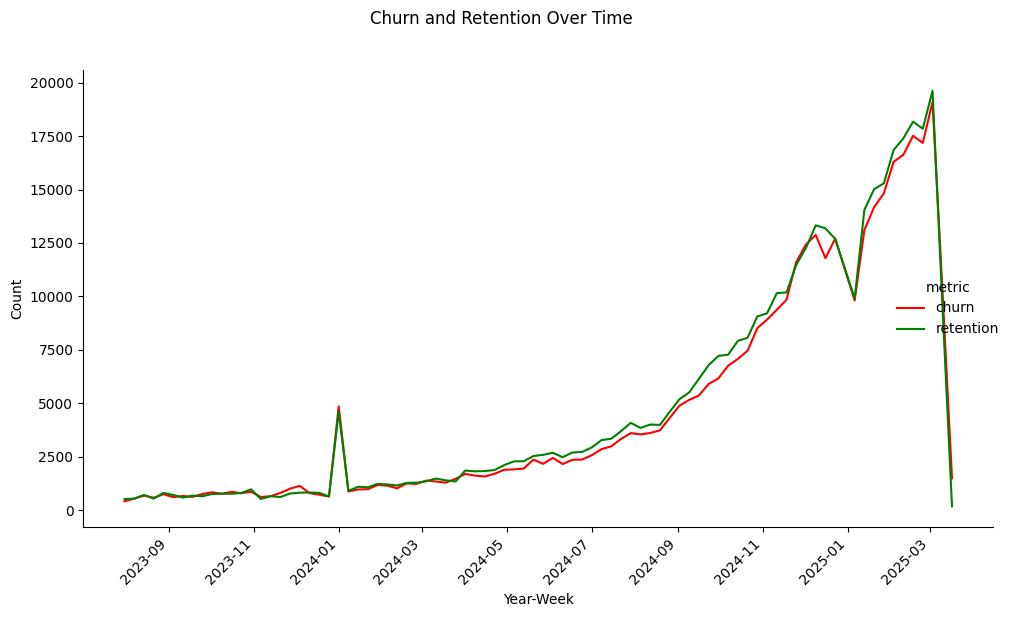

In [248]:
df_client_journey_1 = df_client_journey.groupby("year_week").agg(
    churn=("churned", "sum"),
    retention=("retained", "sum")  # Replace "retained" with your actual retention column
).reset_index()


# Melt the DataFrame to long format for Seaborn
df_long = df_client_journey_1.melt(
    id_vars=["year_week"], 
    value_vars=["churn", "retention"], 
    var_name="metric", 
    value_name="value"
)

# Print the long-form DataFrame
print(df_long.head())

palette = {"churn": "red", "retention": "green"}

# Create a line plot with Seaborn
g = sns.relplot(
    data=df_long, 
    x="year_week", 
    y="value", 
    hue="metric", 
    kind="line", 
    palette= palette,  
    height=6, 
    aspect=1.5  # Adjust aspect ratio
)

# Add labels and title
g.set_axis_labels("Year-Week", "Count")
g.fig.suptitle("Churn and Retention Over Time", y=1.02)  # Add a title

# Rotate x-axis labels for better readability
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()

#### Churn and Retention over time display company growth in the last couple of months, it seems that there are more retention than churn

     weekday  churned
1     Monday    56737
3     Sunday    56298
6  Wednesday    55952
2   Saturday    55711
0     Friday    55149


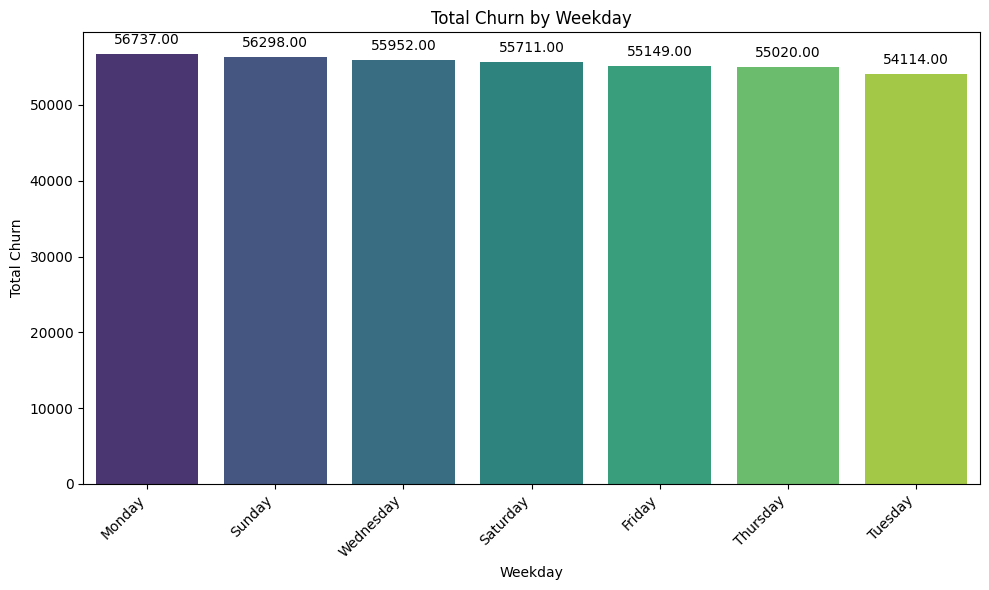

In [257]:
# Import the required visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Aggregate churn by weekday (calculate mean churn)
df_client_journey_2 = df_client_journey.groupby("weekday")["churned"].sum().reset_index()

# Sort the DataFrame by total churn in descending order
df_client_journey_2 = df_client_journey_2.sort_values("churned", ascending=False)

# Print the aggregated data
print(df_client_journey_2.head())

# Create a bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size
ax = sns.barplot(
    data=df_client_journey_2, 
    x="weekday", 
    y="churned", 
    palette="viridis",  # Use a beautiful color palette
    order=df_client_journey_2["weekday"]  # Ensure weekdays are ordered correctly
)

# Add column values (average churn) at the top of each bar
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.2f}",  # Format to 2 decimal places
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', 
        va='center', 
        xytext=(0, 10), 
        textcoords='offset points'
    )

# Add labels and title
plt.xlabel("Weekday")
plt.ylabel("Total Churn")
plt.title("Total Churn by Weekday")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()

  subscription_duration_type  retention
3                     1 week      83434
1                      1 day      77464
4                    10 days      41509
8                     2 days      36529
6                    15 days      31709


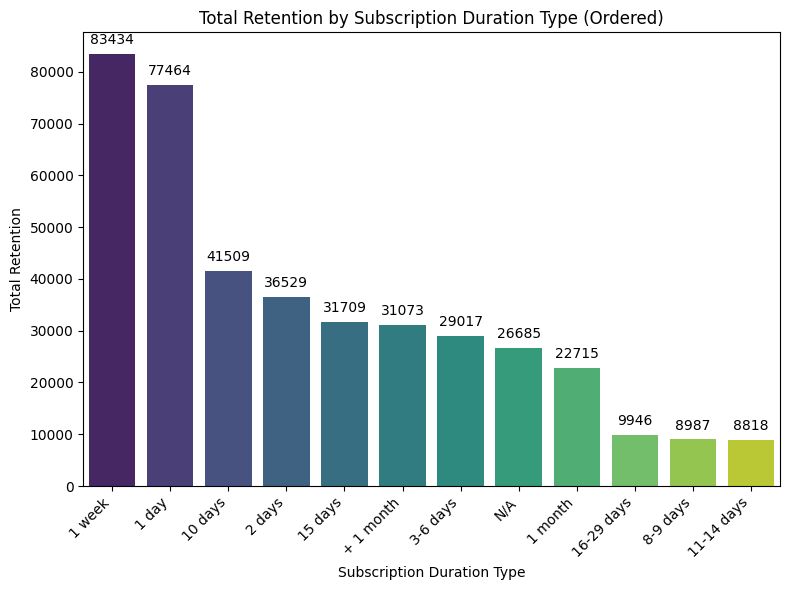

In [258]:
# Aggregate retention by subscription_duration_type
df_client_journey_3 = df_client_journey.groupby("subscription_duration_type").agg(
    retention=("retained", "sum")  # Replace "retained" with your actual retention column
).reset_index()

# Sort the DataFrame by retention in descending order
df_client_journey_3 = df_client_journey_3.sort_values("retention", ascending=False)

# Print the sorted DataFrame
print(df_client_journey_3.head())

# Create a bar plot
plt.figure(figsize=(8, 6))  # Adjust figure size
ax = sns.barplot(
    data=df_client_journey_3, 
    x="subscription_duration_type", 
    y="retention", 
    palette="viridis",  # Use a beautiful color palette
    order=df_client_journey_3["subscription_duration_type"]  # Ensure the bars are ordered
)

# Add column values (retention) at the top of each bar
for p in ax.patches:
    ax.annotate(
        f"{int(p.get_height())}",  # Text to display (retention value)
        (p.get_x() + p.get_width() / 2., p.get_height()),  # Position of the annotation
        ha='center',  # Horizontal alignment
        va='center',  # Vertical alignment
        xytext=(0, 10),  # Offset from the bar
        textcoords='offset points'  # Coordinate system for xytext
    )

# Add labels and title
plt.xlabel("Subscription Duration Type")
plt.ylabel("Total Retention")
plt.title("Total Retention by Subscription Duration Type (Ordered)")

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()

  subscription_duration_type   duration
0                  + 1 month  1630536.0
2                    1 month   681450.0
3                     1 week   584038.0
6                    15 days   475635.0
4                    10 days   415090.0


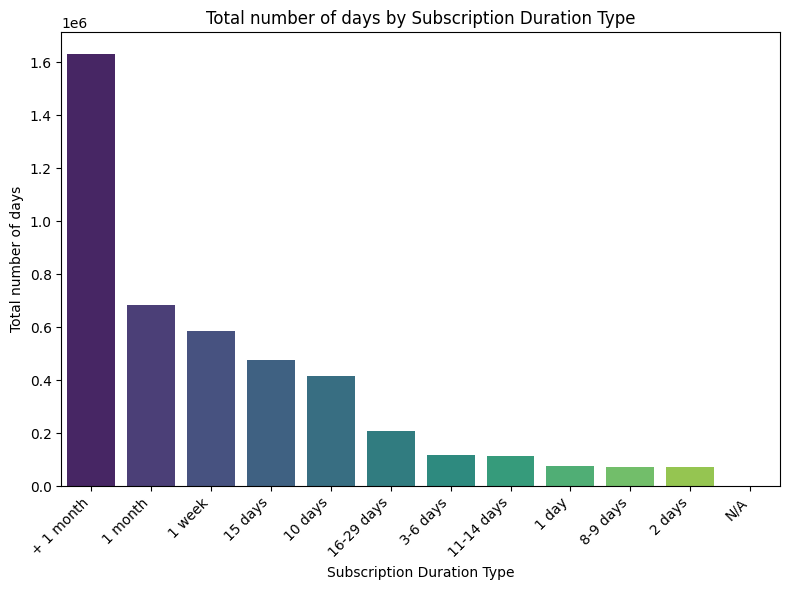

In [259]:
# Example: Aggregate retention by month and subscription_duration_type
df_client_journey_4 = df_client_journey.groupby("subscription_duration_type").agg(
    duration=("subscription_duration", "sum")  # Replace "retained" with your actual retention column
).reset_index()

# Sort the DataFrame by retention in descending order
df_client_journey_4 = df_client_journey_4.sort_values("duration", ascending=False)

# Print the aggregated data
print(df_client_journey_4.head())

# Create a grouped bar plot
plt.figure(figsize=(8, 6)) 
sns.barplot(
    data=df_client_journey_4, 
    x="subscription_duration_type", 
    y="duration",
    palette="viridis"  # Use a beautiful color palette
)

# Add labels and title
plt.xlabel("Subscription Duration Type")
plt.ylabel("Total number of days")
plt.title("Total number of days by Subscription Duration Type")

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()

## Step 6. Identify Key Drivers of Churn

In [260]:
# Group by gaiia_id and aggregate
df_client_journey_sum = df_client_journey.groupby("gaiia_id").agg(
    status_changes=("status", "count"),  # Count of status changes
    total_churned=("churned", "sum"),  # Sum of churned
    total_retained=("retained", "sum"),  # Sum of retained
    mean_subscription_duration=("subscription_duration", "mean"),  # Mean of subscription_duration
    total_subscription_duration=("subscription_duration", "sum")  # Sum of subscription_duration
).reset_index()

# Display the summarized DataFrame
print(df_client_journey_sum.head())

   gaiia_id  status_changes  total_churned  total_retained  \
0     15001              87             41              46   
1     15002              44             15              29   
2     15003             106             51              55   
3     15004              12              6               6   
4     15005               2              1               1   

   mean_subscription_duration  total_subscription_duration  
0                    9.565217                        440.0  
1                   36.689655                       1064.0  
2                    8.555556                        462.0  
3                    5.000000                         30.0  
4                   14.000000                         14.0  


In [261]:
# Group by gaiia_id, subscription_duration_type, and year_month
df_client_journey_sum_by_type = df_client_journey.groupby(
    ["gaiia_id", "subscription_duration_type", "year_month"]
).agg(
    status_changes=("status", "count"),  # Count of status changes
    total_churned=("churned", "sum"),  # Sum of churned
    total_retained=("retained", "sum"),  # Sum of retained
    mean_subscription_duration=("subscription_duration", "mean"),  # Mean of subscription_duration
    total_subscription_duration=("subscription_duration", "sum")  # Sum of subscription_duration
).reset_index()

# Display the summarized DataFrame
print(df_client_journey_sum_by_type.head())

   gaiia_id subscription_duration_type year_month  status_changes  \
0     15001                  + 1 month 2024-08-01               2   
1     15001                  + 1 month 2024-09-01               1   
2     15001                  + 1 month 2025-01-01               1   
3     15001                      1 day 2023-10-01               4   
4     15001                      1 day 2023-11-01               7   

   total_churned  total_retained  mean_subscription_duration  \
0              0               2                       89.00   
1              0               1                       52.00   
2              0               1                       47.00   
3              0               4                        0.25   
4              0               7                        0.00   

   total_subscription_duration  
0                        178.0  
1                         52.0  
2                         47.0  
3                          1.0  
4                          0.0  


In [335]:
# Perform inner join on gaiia_id (df_clients + df_client_journey)
df_merged = pd.merge(
    df_clients,
    df_client_journey_sum_by_type,
    on="gaiia_id",
    how="inner",
    suffixes=("_client", "_journey")
)
# Display the merged DataFrame
display(df_merged.head(2))
display(df_merged.info())

,id,gaiia_id,status,gaiia_status,City,name,created_at,year,subscription_duration_type,year_month,status_changes,total_churned,total_retained,mean_subscription_duration,total_subscription_duration
0,84,15103.0,Instalaciones,ACTIVE,Cartagena,UB NELSON MANDELA SECTOR LAS VEGAS,2023-03-02 15:35:24,2023,+ 1 month,2024-04-01,1,0,1,61.0,61.0
1,84,15103.0,Instalaciones,ACTIVE,Cartagena,UB NELSON MANDELA SECTOR LAS VEGAS,2023-03-02 15:35:24,2023,+ 1 month,2024-08-01,1,0,1,92.0,92.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 419768 entries, 0 to 419767
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   id                           419768 non-null  int64         
 1   gaiia_id                     419768 non-null  float64       
 2   status                       419768 non-null  object        
 3   gaiia_status                 419768 non-null  object        
 4   City                         419768 non-null  object        
 5   name                         419768 non-null  object        
 6   created_at                   419768 non-null  datetime64[ns]
 7   year                         419768 non-null  int64         
 8   subscription_duration_type   419768 non-null  object        
 9   year_month                   419768 non-null  datetime64[ns]
 10  status_changes               419768 non-null  int64         
 11  total_churned             

None

In [366]:
# Perform inner join on gaiia_id (df_clients + df_client_journey + df_invoices)

df_merged_agg = df_merged.groupby(
    ["id","gaiia_id", "City", "subscription_duration_type", "year_month"]
).agg(
    total_churned=("total_churned", "sum"),  # Sum total_churned
    total_retained=("total_retained", "sum"),  # Sum total_retained
    mean_subscription_duration=("mean_subscription_duration", "mean"),  # Mean subscription duration
    total_subscription_duration=("total_subscription_duration", "sum")  # Sum subscription duration
).reset_index()

# Perform the join with df_invoices
df_final = pd.merge(
    df_merged_agg,  # Use the aggregated data
    df_invoices,
    left_on="id",  # Join on gaiia_id
    right_on="client_id",  # Join on client_id
    how="inner",  # Keep all rows from df_invoices
    suffixes=("_client", "_invoice")
)

# Display the merged DataFrame
display(df_final.head(2))
display(df_final.info())

# Verify the total_churned sum for gaiia_id == 41923
print(df_final[df_final["gaiia_id"] == 41923]["total_churned"].sum())

,id_client,gaiia_id,City,subscription_duration_type,year_month,total_churned,total_retained,mean_subscription_duration,total_subscription_duration,id_invoice,created_at,client_id,payment_gateway,year
0,84,15103.0,Cartagena,+ 1 month,2024-04,0,1,61.0,61.0,14471,2024-05-01 19:12:22,84,NEQUI,2024
1,84,15103.0,Cartagena,+ 1 month,2024-04,0,1,61.0,61.0,26270,2024-06-04 13:18:20,84,NEQUI,2024


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9096049 entries, 0 to 9096048
Data columns (total 14 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   id_client                    int64         
 1   gaiia_id                     float64       
 2   City                         object        
 3   subscription_duration_type   object        
 4   year_month                   object        
 5   total_churned                int64         
 6   total_retained               int64         
 7   mean_subscription_duration   float64       
 8   total_subscription_duration  float64       
 9   id_invoice                   int64         
 10  created_at                   datetime64[ns]
 11  client_id                    int64         
 12  payment_gateway              object        
 13  year                         int64         
dtypes: datetime64[ns](1), float64(3), int64(6), object(4)
memory usage: 1.0+ GB


None

117


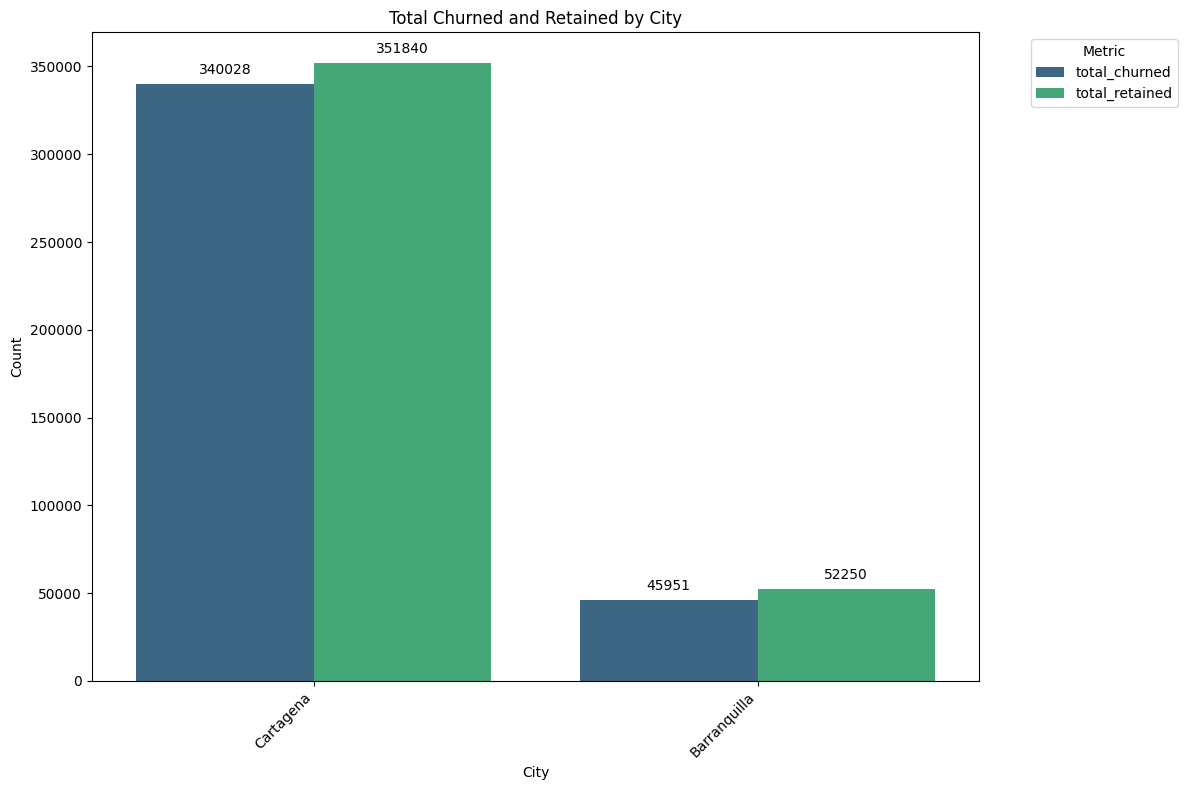

In [337]:
# Import the required visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Group by City and sum total_churned and total_retained
df_city_summary = df_merged.groupby("City").agg(
    total_churned=("total_churned", "sum"),
    total_retained=("total_retained", "sum")
).reset_index()

# Sort the DataFrame by total_churned in descending order
df_city_summary = df_city_summary.sort_values("total_churned", ascending=False)

# Melt the DataFrame to long format for Seaborn
df_city_melted = df_city_summary.melt(
    id_vars=["City"], 
    value_vars=["total_churned", "total_retained"], 
    var_name="metric", 
    value_name="value"
)

# Create a grouped bar plot
plt.figure(figsize=(12, 8))  # Adjust figure size
ax = sns.barplot(
    data=df_city_melted, 
    x="City", 
    y="value", 
    hue="metric",  # Differentiate between total_churned and total_retained
    palette="viridis"  # Use a beautiful color palette
)

# Add column values (total_churned and total_retained) at the top of each bar
for p in ax.patches:
    ax.annotate(
        f"{int(p.get_height())}",  # Format as integer
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', 
        va='center', 
        xytext=(0, 10), 
        textcoords='offset points'
    )

# Add labels and title
plt.xlabel("City")
plt.ylabel("Count")
plt.title("Total Churned and Retained by City")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Move the legend outside the plot
plt.legend(title="Metric", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()

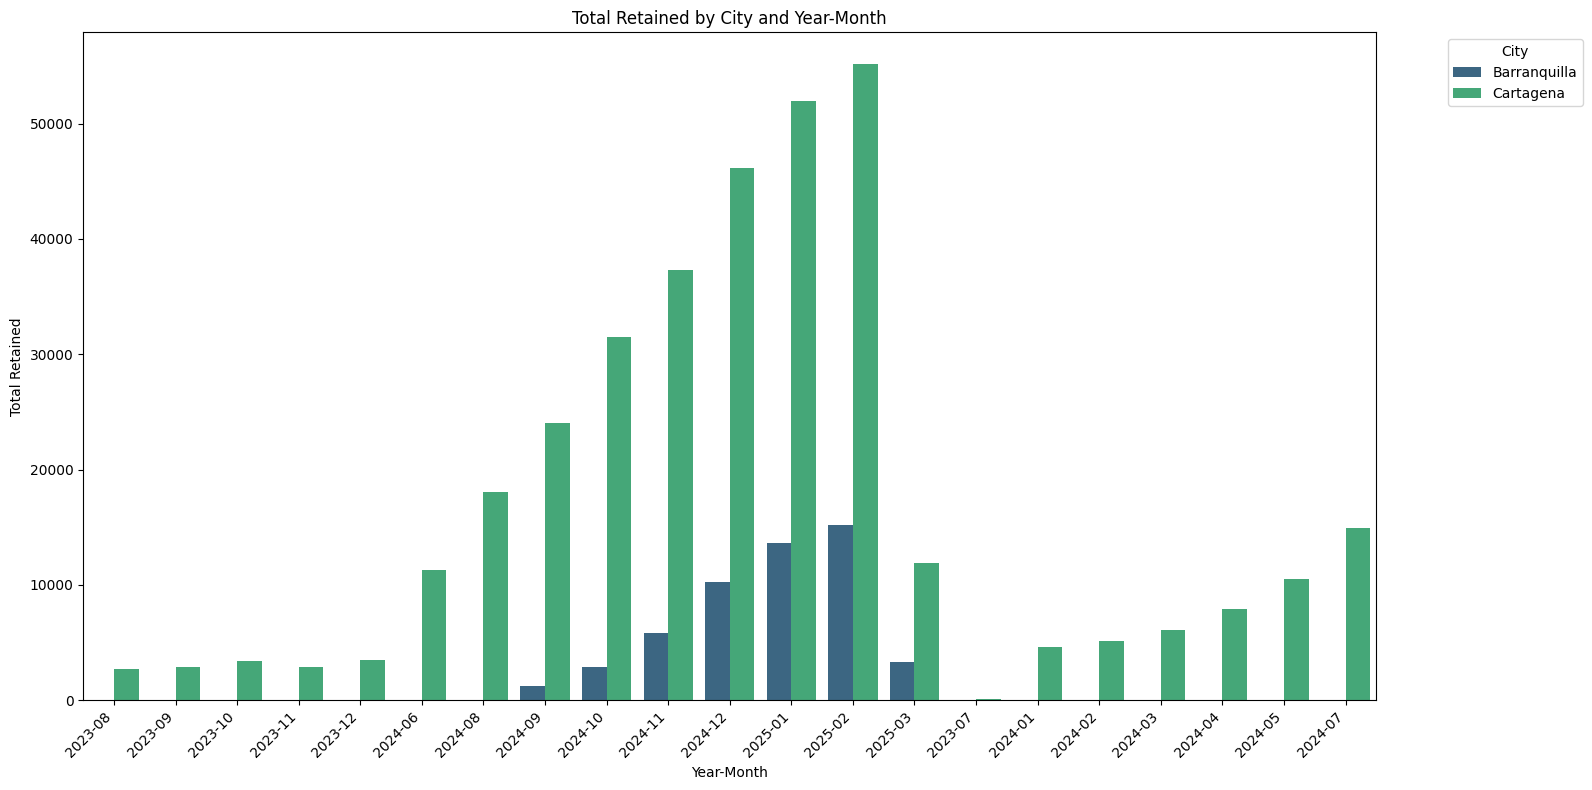

In [340]:
# Convert year_month to the desired format (YYYY-MM)
df_merged["year_month"] = df_merged["year_month"].dt.strftime("%Y-%m")

# Group by City and year_month, and sum total_retained
df_city_month_retained = df_merged.groupby(["City", "year_month"]).agg(
    total_retained=("total_retained", "sum")
).reset_index()

# Sort the DataFrame by City and year_month
df_city_month_retained = df_city_month_retained.sort_values(["City", "year_month"])

# Create a bar plot
plt.figure(figsize=(16, 8))  # Adjust figure size
ax = sns.barplot(
    data=df_city_month_retained, 
    x="year_month", 
    y="total_retained", 
    hue="City",  # Differentiate between cities
    palette="viridis"  # Use a beautiful color palette
)

# Add labels and title
plt.xlabel("Year-Month")
plt.ylabel("Total Retained")
plt.title("Total Retained by City and Year-Month")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Move the legend outside the plot
plt.legend(title="City", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()

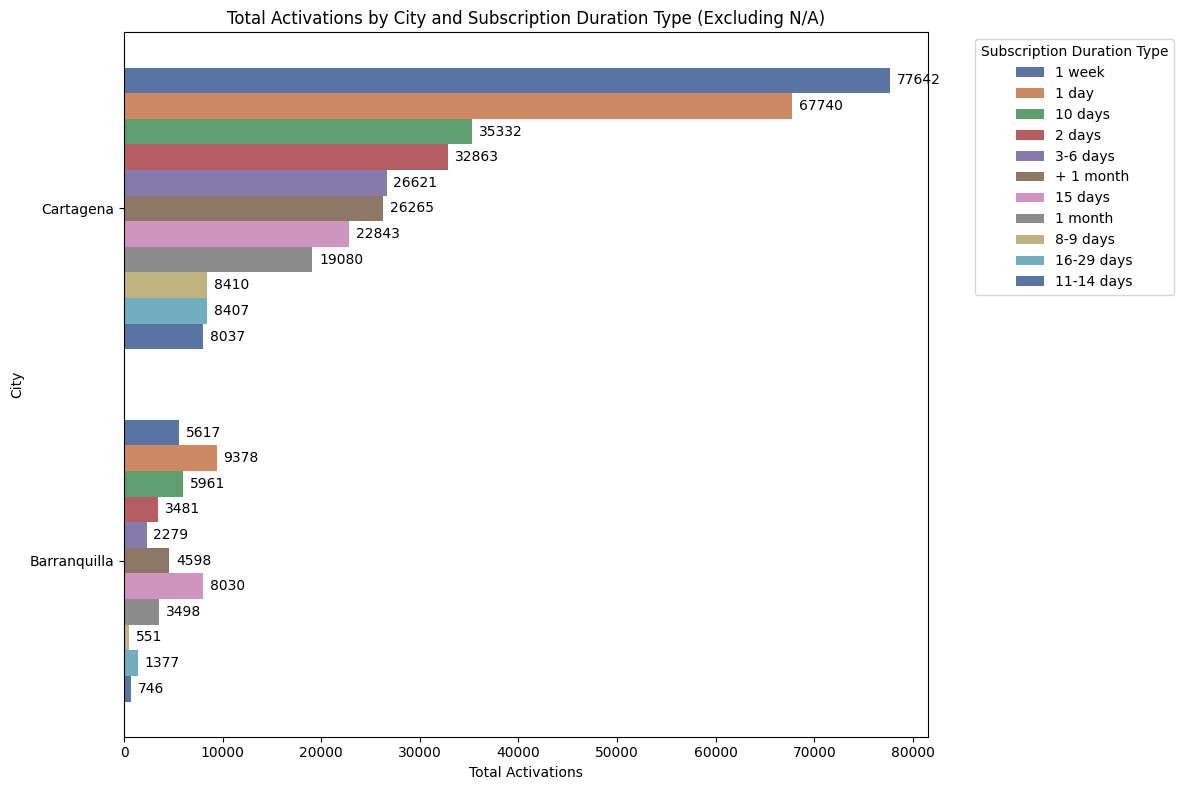

In [350]:
# Import the required visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Filter out rows where subscription_duration_type is N/A
df_filtered = df_merged[df_merged["subscription_duration_type"] != "N/A"]

# Group by City and subscription_duration_type, and sum the activations
df_city_subscription_summary = df_filtered.groupby(["City", "subscription_duration_type"]).agg(
    total_activations=("status_changes", "sum")  # Assuming "status_changes" represents activations
).reset_index()

# Sort the DataFrame by total_activations in descending order
df_city_subscription_summary = df_city_subscription_summary.sort_values("total_activations", ascending=False)

# Get the order of cities based on total_activations
city_order = df_city_subscription_summary.groupby("City")["total_activations"].sum().sort_values(ascending=False).index

# Create a horizontal grouped bar plot
plt.figure(figsize=(12, 8))  # Adjust figure size
ax = sns.barplot(
    data=df_city_subscription_summary, 
    y="City",  # Swap x and y for horizontal bars
    x="total_activations", 
    hue="subscription_duration_type",  # Differentiate by subscription_duration_type
    palette="deep",  # Use a beautiful color palette
    order=city_order  # Order cities by total_activations
)

# Add column values (total_activations) at the end of each bar
for p in ax.patches:
    ax.annotate(
        f"{int(p.get_width())}",  # Format as integer
        (p.get_width(), p.get_y() + p.get_height() / 2.),  # Position of the annotation
        ha='left',  # Horizontal alignment
        va='center',  # Vertical alignment
        xytext=(5, 0),  # Offset from the bar
        textcoords='offset points'
    )

# Add labels and title
plt.ylabel("City")
plt.xlabel("Total Activations")
plt.title("Total Activations by City and Subscription Duration Type (Excluding N/A)")

# Move the legend outside the plot
plt.legend(title="Subscription Duration Type", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()

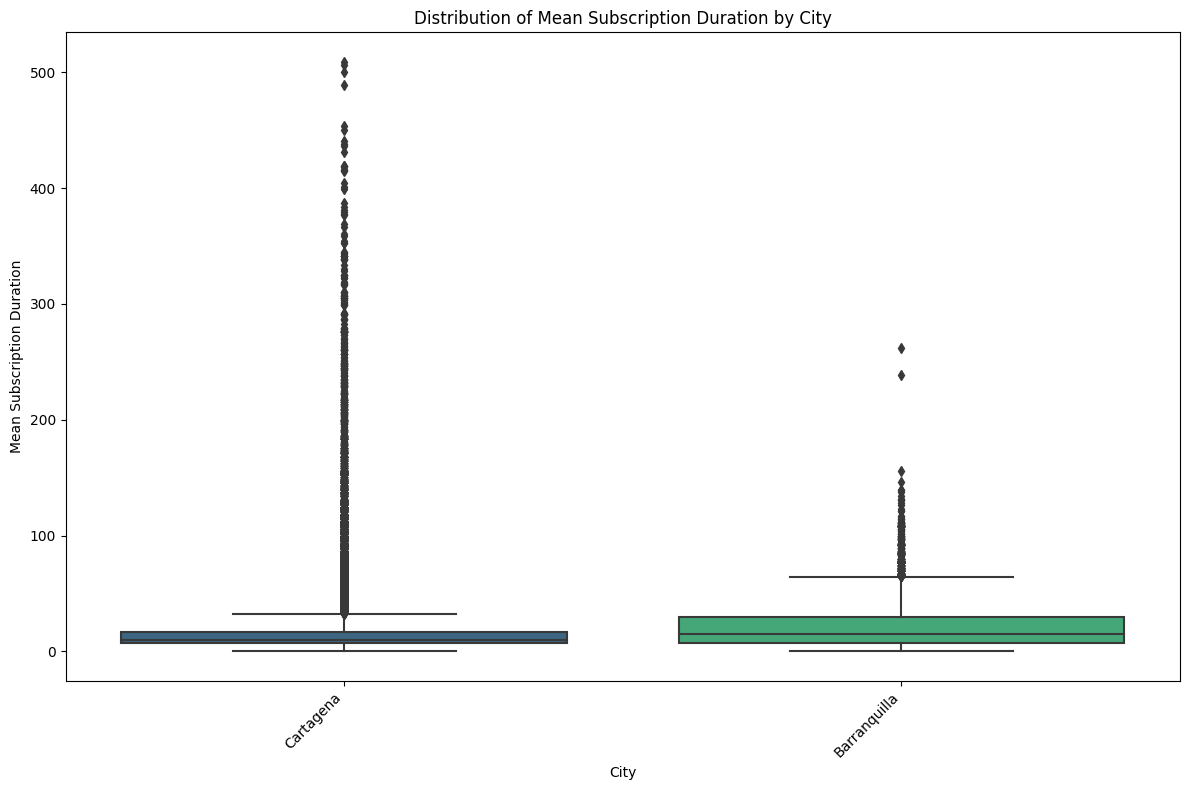

In [351]:
# Import the required visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Group by City and calculate the mean of mean_subscription_duration
df_city_subscription_duration = df_merged.groupby("City")["mean_subscription_duration"].mean().reset_index()

# Create a box plot
plt.figure(figsize=(12, 8))  # Adjust figure size
sns.boxplot(
    data=df_merged, 
    x="City", 
    y="mean_subscription_duration", 
    palette="viridis"  # Use a beautiful color palette
)

# Add labels and title
plt.xlabel("City")
plt.ylabel("Mean Subscription Duration")
plt.title("Distribution of Mean Subscription Duration by City")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()

## Step 7. Actionable Insights

## help

In [353]:
unique_gaiia_ids = df_merged["gaiia_id"].unique().tolist()
print(unique_gaiia_ids)

[15206.0, 17328.0, 17295.0, 17161.0, 16310.0, 16371.0, 16801.0, 16332.0, 17365.0, 17198.0, 17306.0, 15619.0, 16200.0, 15782.0, 16190.0, 16234.0, 15374.0, 15873.0, 17459.0, 17067.0, 17502.0, 15629.0, 17029.0, 16987.0, 17192.0, 16344.0, 15280.0, 16643.0, 15096.0, 16393.0, 15861.0, 15248.0, 15078.0, 16375.0, 16186.0, 15926.0, 17363.0, 17367.0, 17308.0, 16983.0, 15392.0, 15222.0, 17373.0, 16086.0, 16033.0, 15734.0, 15710.0, 16652.0, 17155.0, 15871.0, 16364.0, 16480.0, 15026.0, 16262.0, 16194.0, 16098.0, 15609.0, 15854.0, 17310.0, 16250.0, 16321.0, 15468.0, 15784.0, 16956.0, 15365.0, 15574.0, 15107.0, 15394.0, 17018.0, 17412.0, 15332.0, 16441.0, 17304.0, 15562.0, 15970.0, 15061.0, 16088.0, 15249.0, 16304.0, 15471.0, 17283.0, 17388.0, 15519.0, 17353.0, 15447.0, 16428.0, 15496.0, 16288.0, 17426.0, 16609.0, 16438.0, 15232.0, 16117.0, 16362.0, 15203.0, 16629.0, 15639.0, 17114.0, 16350.0, 15359.0, 15983.0, 16014.0, 17357.0, 17513.0, 16563.0, 17257.0, 16405.0, 17309.0, 15472.0, 16161.0, 16102.0, 

In [ ]:
display(df_merged.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 419768 entries, 7611 to 419767
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   id                           419768 non-null  int64         
 1   gaiia_id                     419768 non-null  float64       
 2   status                       419768 non-null  object        
 3   gaiia_status                 419768 non-null  object        
 4   City                         419768 non-null  object        
 5   name                         419768 non-null  object        
 6   created_at                   419768 non-null  datetime64[ns]
 7   year                         419768 non-null  int64         
 8   subscription_duration_type   419768 non-null  object        
 9   year_month                   419768 non-null  object        
 10  status_changes               419768 non-null  int64         
 11  total_churned          

None

In [367]:
#duplicates validation

display(df_client_journey[df_client_journey["gaiia_id"] == 32417]["churned"].sum())
display(df_client_journey[df_client_journey["gaiia_id"] == 32417]["subscription_duration_type"].value_counts())

display(df_merged[df_merged["gaiia_id"] == 32417]["total_churned"].sum())
display(df_merged[df_merged["gaiia_id"] == 32417]["subscription_duration_type"].value_counts())

display(df_merged_agg[df_merged_agg["gaiia_id"] == 32417]["total_churned"].sum())
display(df_merged_agg[df_merged_agg["gaiia_id"] == 32417]["subscription_duration_type"].value_counts())

display(df_final[df_final["gaiia_id"] == 32417]["total_churned"].sum())
display(df_final[df_final["gaiia_id"] == 32417]["subscription_duration_type"].value_counts())

9

N/A          9
1 week       3
15 days      2
10 days      2
+ 1 month    1
8-9 days     1
Name: subscription_duration_type, dtype: int64

9

N/A          5
1 week       3
15 days      2
10 days      2
+ 1 month    1
8-9 days     1
Name: subscription_duration_type, dtype: int64

9

N/A          5
1 week       3
10 days      2
15 days      2
+ 1 month    1
8-9 days     1
Name: subscription_duration_type, dtype: int64

90

N/A          50
1 week       30
10 days      20
15 days      20
+ 1 month    10
8-9 days     10
Name: subscription_duration_type, dtype: int64